<a href="https://colab.research.google.com/github/pachterlab/gget_examples/blob/main/gget_elm_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `gget elm` tutorial
In this tutorial, we will explore different types of inputs to `gget elm` which each traverse a different "path" in the `gget elm` back-end.  

Please note that ELM data can be downloaded & distributed only for academic and/or non-commercial use. Any industry/commercial usage should be done according to the [ELM Software License Agreement](http://elm.eu.org/media/Elm_academic_license.pdf).

The three examples are:
1. The input is a UniProt ID that matches a protein contained in the ELM database -> `gget elm` will return the validated motifs contained in that protein according to the ELM database + `gget elm` will generate regex matches based on its amino acid sequence fetched from UniProt.
2. The input is a UniProt ID that does not match a protein contained in the ELM database -> `gget elm` will return the motif information matching orthologous proteins contained in the ELM database based on DIAMOND alignment of its amino acid sequence fetched from UniProt + `gget elm` will generate regex matches based on its amino acid sequence fetched from UniProt.
3. The input is an amino acid sequence -> `gget elm` will return the information matching orthologous proteins contained in the ELM database based on DIAMOND alignment of the amino acid sequence + `gget elm` will generate regex matches based on the provided sequence.

### Install and import gget:

In [1]:
!pip install -qU gget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 58.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import gget

Show documentation of ELM module:

In [3]:
help(gget.elm)

Help on function elm in module gget.gget_elm:

elm(sequence, uniprot=False, sensitivity='very-sensitive', threads=1, diamond_binary=None, expand=False, verbose=True, json=False, out=None)
    Locally predicts Eukaryotic Linear Motifs from an amino acid sequence or UniProt ID using
    data from the ELM database (http://elm.eu.org/).
    
    Args:
    - sequence         Amino acid sequence or Uniprot ID (str).
                       If Uniprot ID, set 'uniprot==True'.
    - uniprot          Set to True if the input is a Uniprot ID instead of an amino acid sequence. Default: False.
    - sensitivity      Sensitivity of DIAMOND alignment.
                       One of the following: fast, mid-sensitive, sensitive, more-sensitive, very-sensitive, or ultra-sensitive.
                       Default: "very-sensitive"
    - threads          Number of threads used in DIAMOND alignment. Default: 1.
    - diamond_binary   Path to DIAMOND binary. Default: None -> Uses DIAMOND binary installed wit

In [4]:
# To display all columns of the resulting data frames
import pandas as pd
pd.set_option('display.max_columns', None)


### Download ELM database files:
These files will be saved in the gget installation folder.

In [5]:
gget.setup("elm")

# Command line alternative:
# !gget setup elm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87336  100 87336    0     0  71598      0  0:00:01  0:00:01 --:--:-- 71645
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  914k  100  914k    0     0   384k      0  0:00:02  0:00:02 --:--:--  384k
100 2123k  100 2123k    0     0   525k      0  0:00:04  0:00:04 --:--:--  525k


# Path 1: The input is a UniProt ID that matches a protein contained in the ELM database
`gget elm` will return the validated motifs contained in that protein according to the ELM database + `gget elm` will generate regex matches based on its amino acid sequence fetched from UniProt.
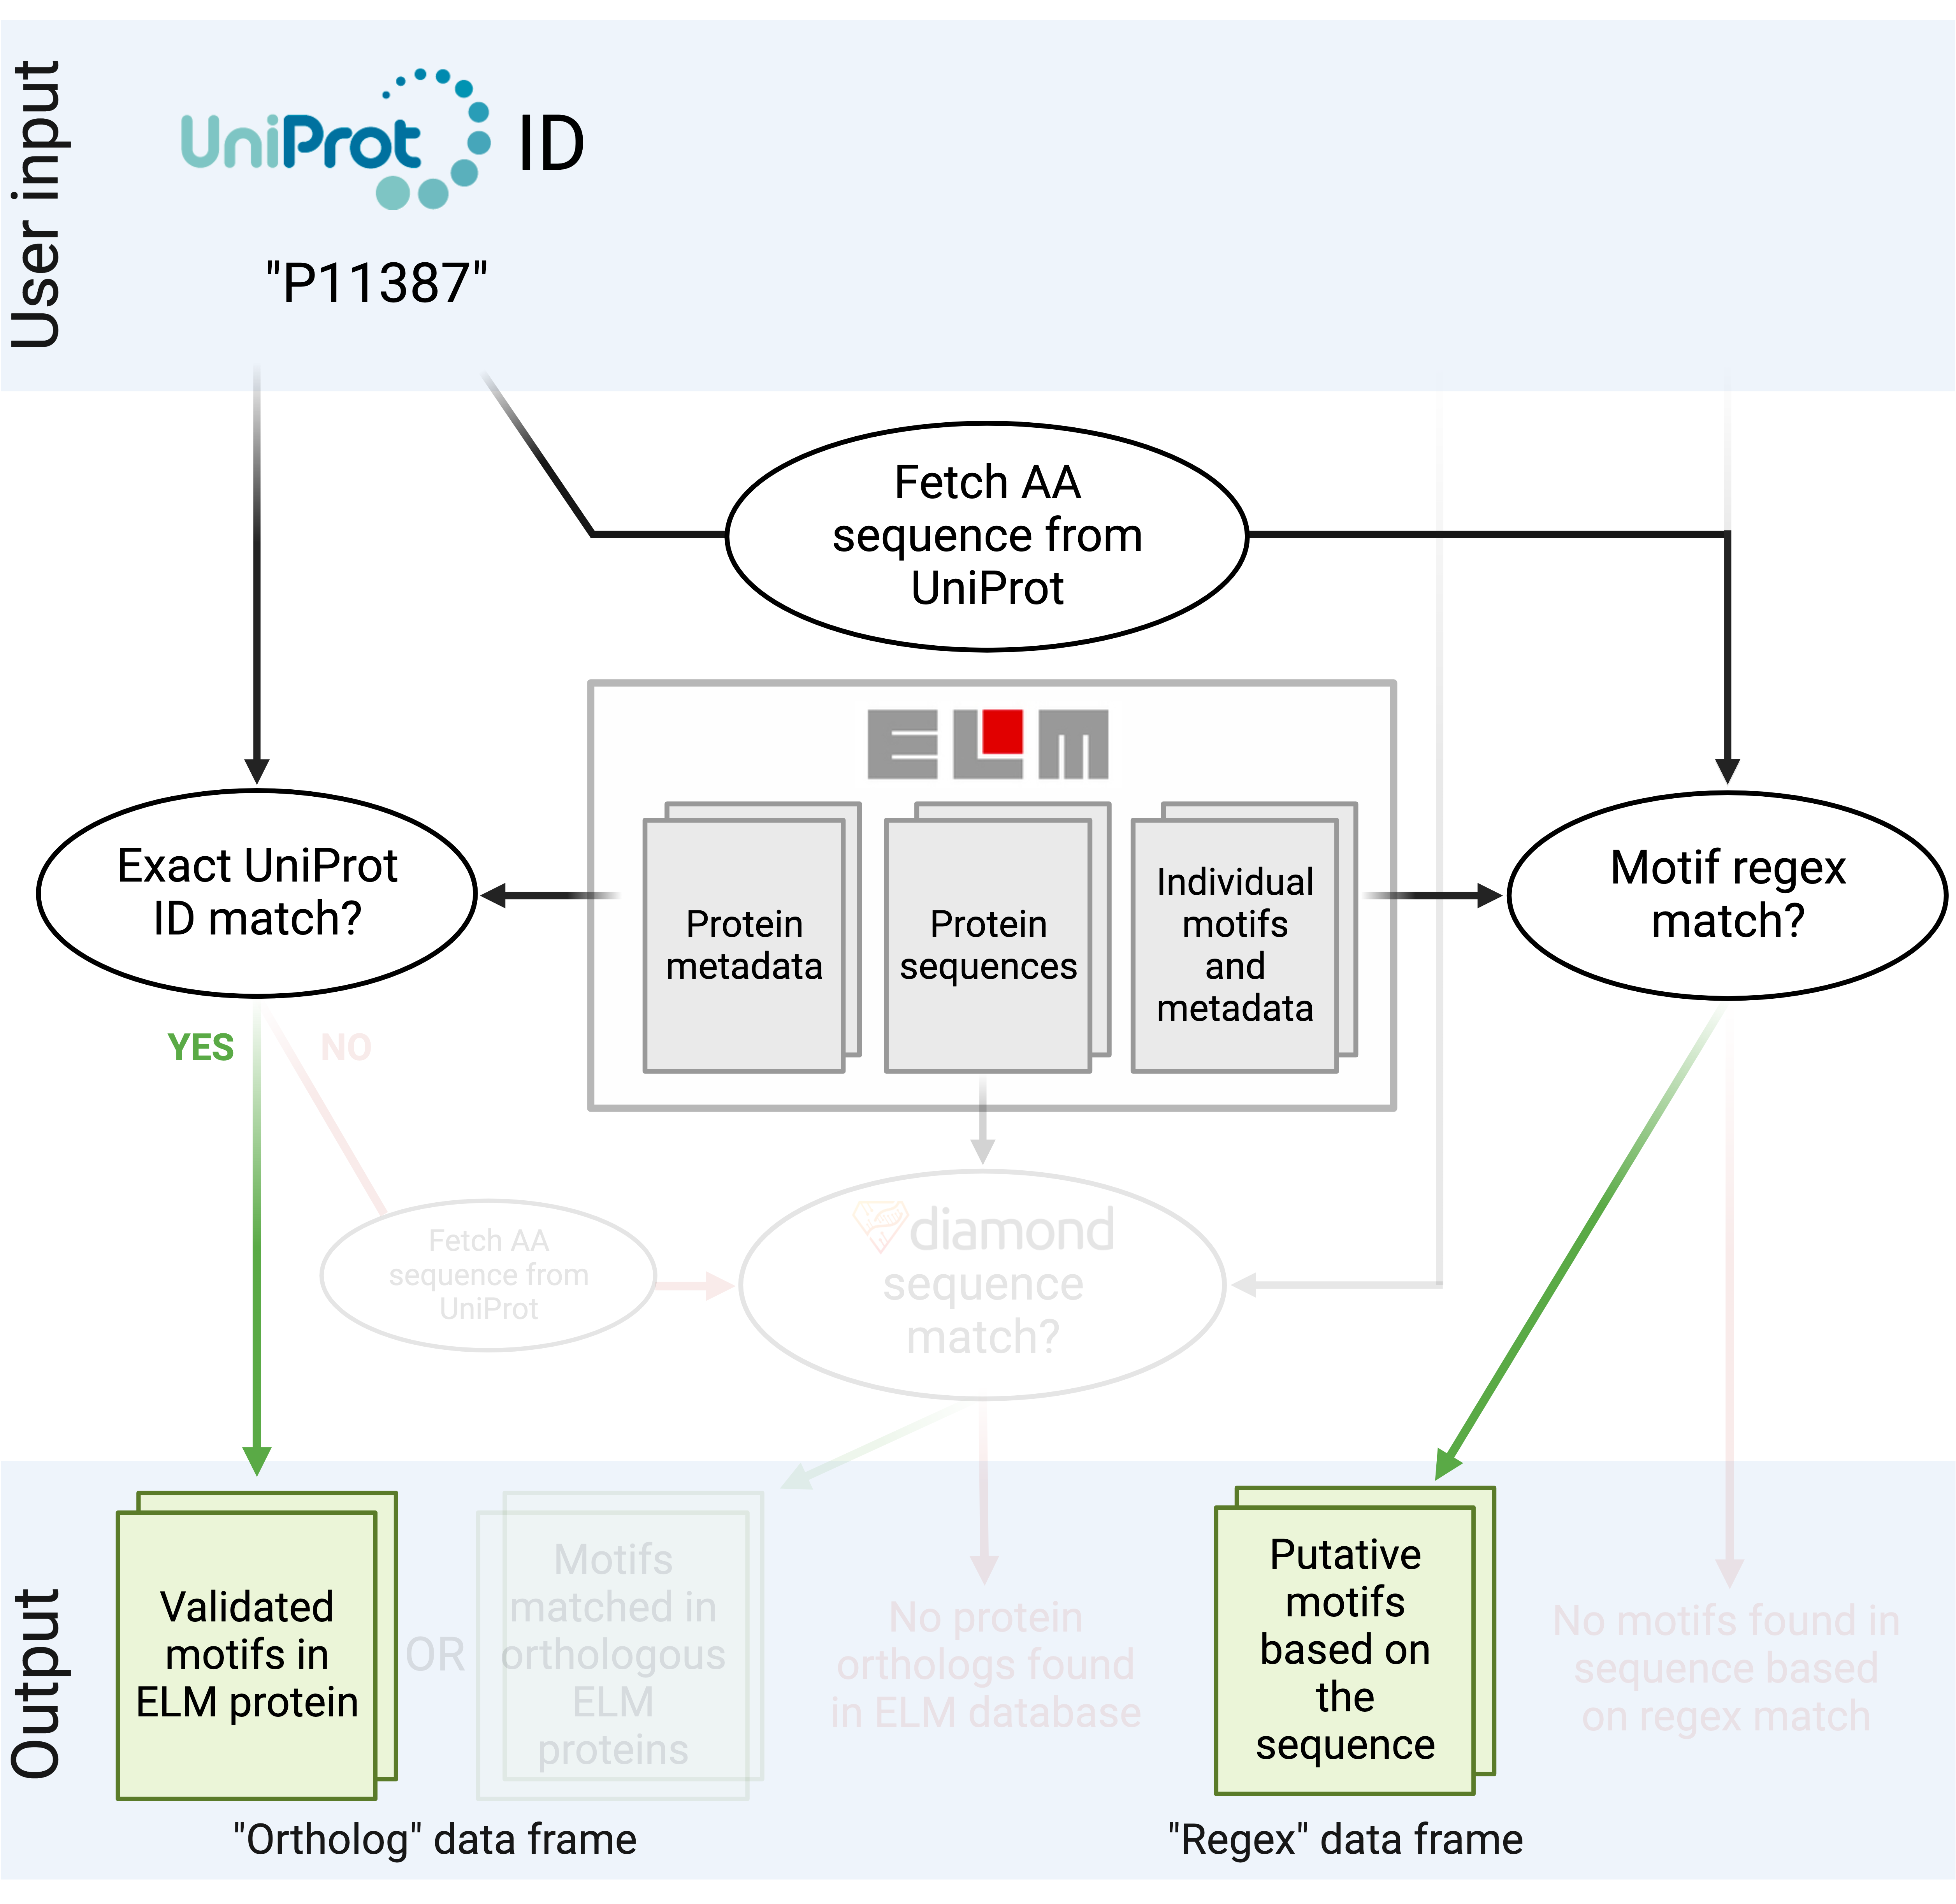

In [6]:
uniprot_id1 = "P11387"
ortholog1, regex1 = gget.elm(uniprot_id1, uniprot=True)

In the data frame below, the fields containing information about the DIAMOND alignment (e.g. identity percentage and whether the motif is within subject-query overlap ('motif_in_query')) are empty/not applicable since no DIAMOND alignment was performed.  

NOTE: We call this data frame "ortholog" for consistency, but it actually includes the information about the exact protein provided by the user since it is included in ELM (rather than motifs that matched orthologous proteins).

In [7]:
ortholog1

Ortholog_UniProt_ID ProteinName class_accession ELMIdentifier  \
0              P11387  TOP1_HUMAN      ELME000251    LIG_KEPE_2   

  FunctionalSiteName                                        Description  \
0   Sumoylation site  Medium length variant of the KEPE motif which ...   

                    Regex  Probability                    Methods  \
0  [VILMFT]K.EP.{2,3}[DE]     0.000035  sequence based prediction   

       Organism  query_seq_length  subject_seq_length  alignment_length  \
0  Homo sapiens               NaN                 NaN               NaN   

   identity_percentage  motif_in_query  query_start  query_end  subject_start  \
0                  NaN             NaN          NaN        NaN            NaN   

   subject_end  motif_start_in_subject  motif_end_in_subject References  \
0          NaN                     116                   123   19033273   

   InstanceLogic  PDB  #Instances  #Instances_in_PDB  
0  true positive  NaN          12                  0

Rows in the regex data frame might look repeated if a motif occurs in the sequence more than once:

In [8]:
regex1

Instance_accession       ELMIdentifier  \
0           ELME000321  CLV_C14_Caspase3-7   
1           ELME000321  CLV_C14_Caspase3-7   
2           ELME000102       CLV_NRD_NRD_1   
3           ELME000102       CLV_NRD_NRD_1   
4           ELME000102       CLV_NRD_NRD_1   
..                 ...                 ...   
304         ELME000271  TRG_NLS_MonoExtN_4   
305         ELME000271  TRG_NLS_MonoExtN_4   
306         ELME000546      TRG_Oom_RxLR_1   
307         ELME000462  TRG_Pf-PMV_PEXEL_1   
308         ELME000462  TRG_Pf-PMV_PEXEL_1   

                                    FunctionalSiteName ELMType  \
0                               Caspase cleavage motif     CLV   
1                               Caspase cleavage motif     CLV   
2                                    NRD cleavage site     CLV   
3                                    NRD cleavage site     CLV   
4                                    NRD cleavage site     CLV   
..                                                 ...     ...   
304         NLS classical Nuclear Localization Signals     TRG   
305         NLS classical Nuclear Localization Signals     TRG   
306  Oomycete secretory protein processing motif pe...     TRG   
307                          Apicomplexan export motif     TRG   
308                          Apicomplexan export motif     TRG   

                                           Description  \
0               Caspase-3 and Caspase-7 cleavage site.   
1               Caspase-3 and Caspase-7 cleavage site.   
2    N-Arg dibasic convertase (NRD/Nardilysin) clea...   
3    N-Arg dibasic convertase (NRD/Nardilysin) clea...   
4    N-Arg dibasic convertase (NRD/Nardilysin) clea...   
..                                                 ...   
304  Monopartite variant of the classical basically...   
305  Monopartite variant of the classical basically...   
306                     Oomycete host targeting signal   
307  Plasmodium Export Element, PEXEL, is a traffic...   
308  Plasmodium Export Element, PEXEL, is a traffic...   

                                                 Regex  \
0                          [DSTE][^P][^DEWHFYC]D[GSAN]   
1                          [DSTE][^P][^DEWHFYC]D[GSAN]   
2                                      (.RK)|(RR[^KR])   
3                                      (.RK)|(RR[^KR])   
4                                      (.RK)|(RR[^KR])   
..                                                 ...   
304  (([PKR].{0,1}[^DE])|([PKR]))((K[RK])|(RK))(([^...   
305  (([PKR].{0,1}[^DE])|([PKR]))((K[RK])|(RK))(([^...   
306                                      ((R)|(K.)).LR   
307                (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)   
308                (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)   

    Instances (Matched Sequence) motif_start_in_query motif_end_in_query  \
0                          EHKDS                   52                 57   
1                          TKIDA                  648                653   
2                            KRK                   87                 90   
3                            KRK                  161                164   
4                            FRK                  273                276   
..                           ...                  ...                ...   
304                      KLKKPKN                  171                178   
305                     PDNKKKKP                  187                195   
306                        KLALR                  483                488   
307                        RKLEE                  162                167   
308                        KLLKE                  332                337   

     InstanceLogic  #Instances  #Instances_in_PDB  
0    true positive          41                  0  
1    true positive          41                  0  
2    true positive           2                  0  
3    true positive           2                  0  
4    true positive           2                  0  
..             ...         ...         

In [9]:
print("Number of unique motifs found: ", len(regex1["ELMIdentifier"].unique()))

Number of unique motifs found:  80


In [10]:
print("Motifs found: ", regex1["ELMIdentifier"].unique())

Motifs found:  ['CLV_C14_Caspase3-7' 'CLV_NRD_NRD_1' 'CLV_PCSK_KEX2_1'
 'CLV_PCSK_PC1ET2_1' 'CLV_PCSK_PC7_1' 'CLV_PCSK_SKI1_1'
 'DEG_APCC_KENBOX_2' 'DEG_COP1_1' 'DOC_CYCLIN_RxL_1'
 'DOC_CYCLIN_yClb5_NLxxxL_5' 'DOC_MAPK_gen_1' 'DOC_MAPK_HePTP_8'
 'DOC_MAPK_MEF2A_6' 'DOC_PP1_RVXF_1' 'DOC_PP2A_B56_1' 'DOC_PP4_FxxP_1'
 'DOC_USP7_UBL2_3' 'DOC_WW_Pin1_4' 'LIG_14-3-3_CanoR_1' 'LIG_APCC_ABBA_1'
 'LIG_Arc_Nlobe_1' 'LIG_BIR_II_1' 'LIG_BRCT_BRCA1_1' 'LIG_CAP-Gly_1'
 'LIG_Clathr_ClatBox_1' 'LIG_deltaCOP1_diTrp_1' 'LIG_EVH1_2' 'LIG_FHA_1'
 'LIG_FHA_2' 'LIG_HCF-1_HBM_1' 'LIG_KEPE_1' 'LIG_KEPE_2' 'LIG_LIR_Apic_2'
 'LIG_LIR_Gen_1' 'LIG_LIR_Nem_3' 'LIG_MLH1_MIPbox_1' 'LIG_MTR4_AIM_1'
 'LIG_PDZ_Class_2' 'LIG_Pex14_2' 'LIG_RB_pABgroove_1' 'LIG_REV1ctd_RIR_1'
 'LIG_SH2_CRK' 'LIG_SH2_GRB2like' 'LIG_SH2_PTP2' 'LIG_SH2_SRC'
 'LIG_SH2_STAT5' 'LIG_SH3_3' 'LIG_SH3_4' 'LIG_TRAF3_MATH_PxP_3'
 'LIG_TRAF6_MATH_1' 'LIG_TYR_ITIM' 'LIG_UBA3_1' 'LIG_WD40_WDR5_VDV_2'
 'LIG_WRC_WIRS_1' 'MOD_CDK_SPK_2' 'MOD_CK1_1' 'MOD_CK

Corresponding result from the ELM website interface (fetch time 00:15.85, compared to 00:02 with `gget`):
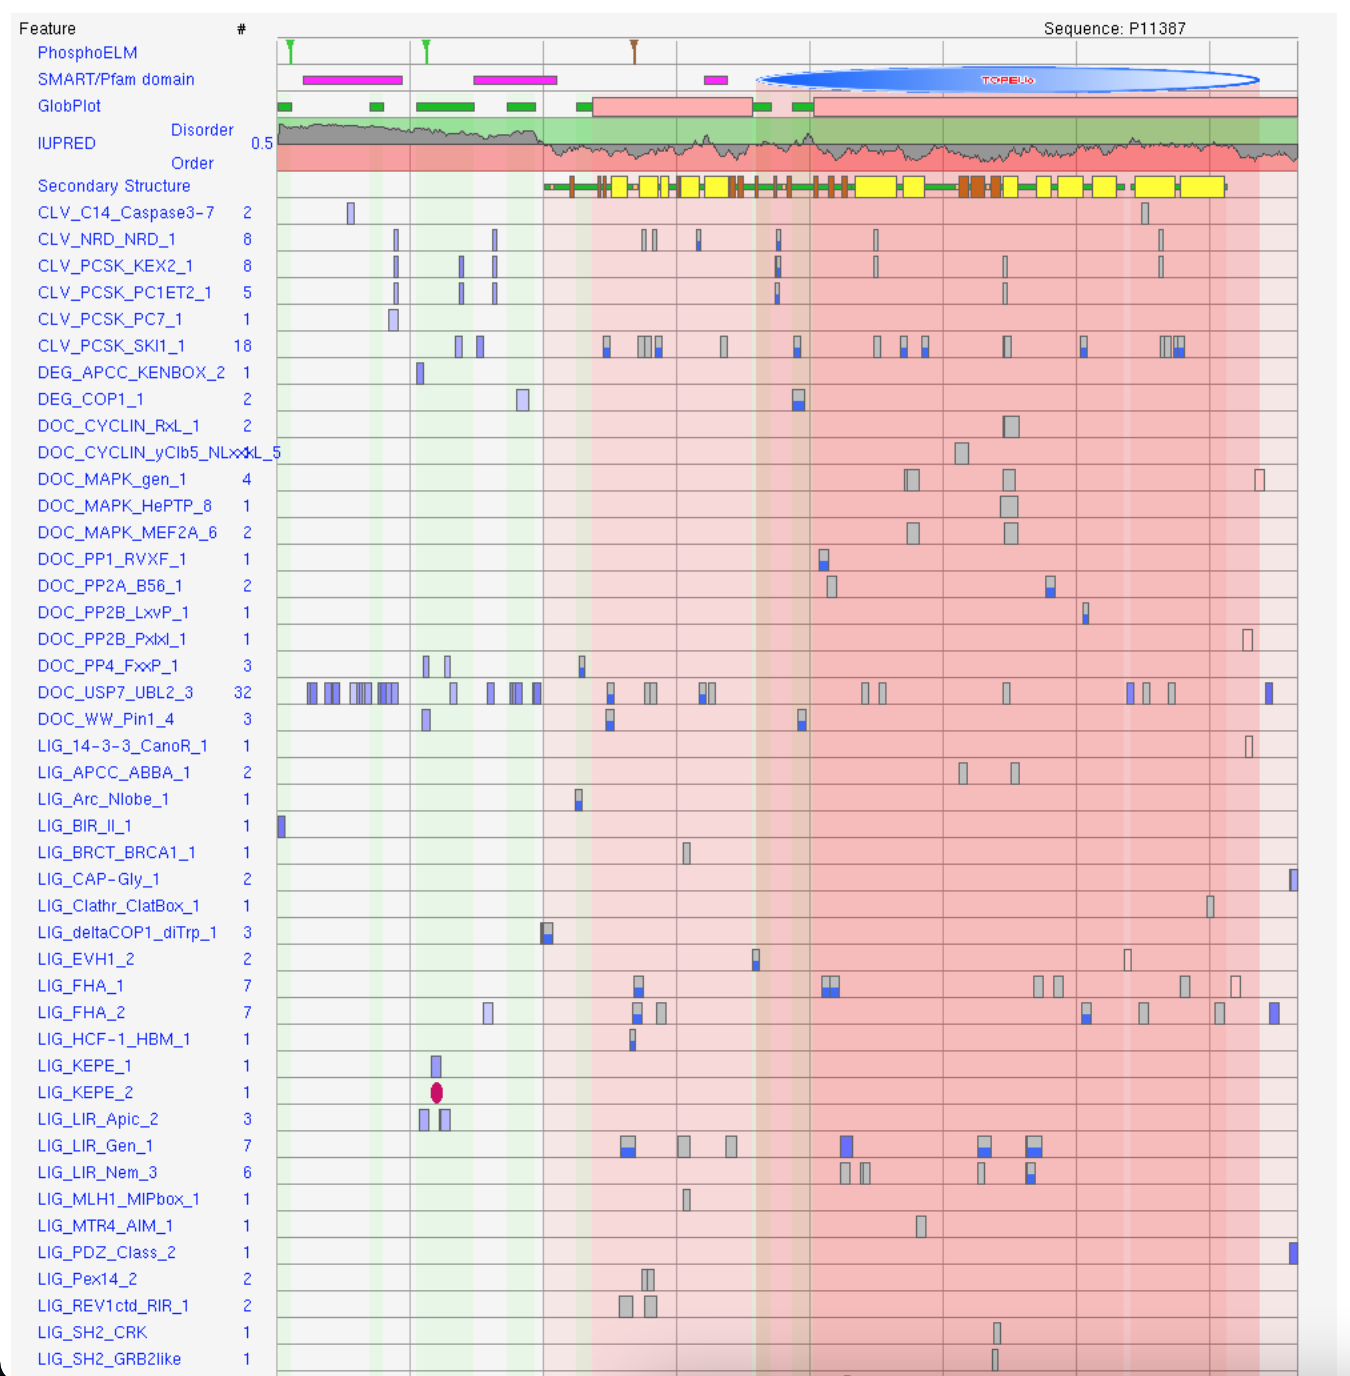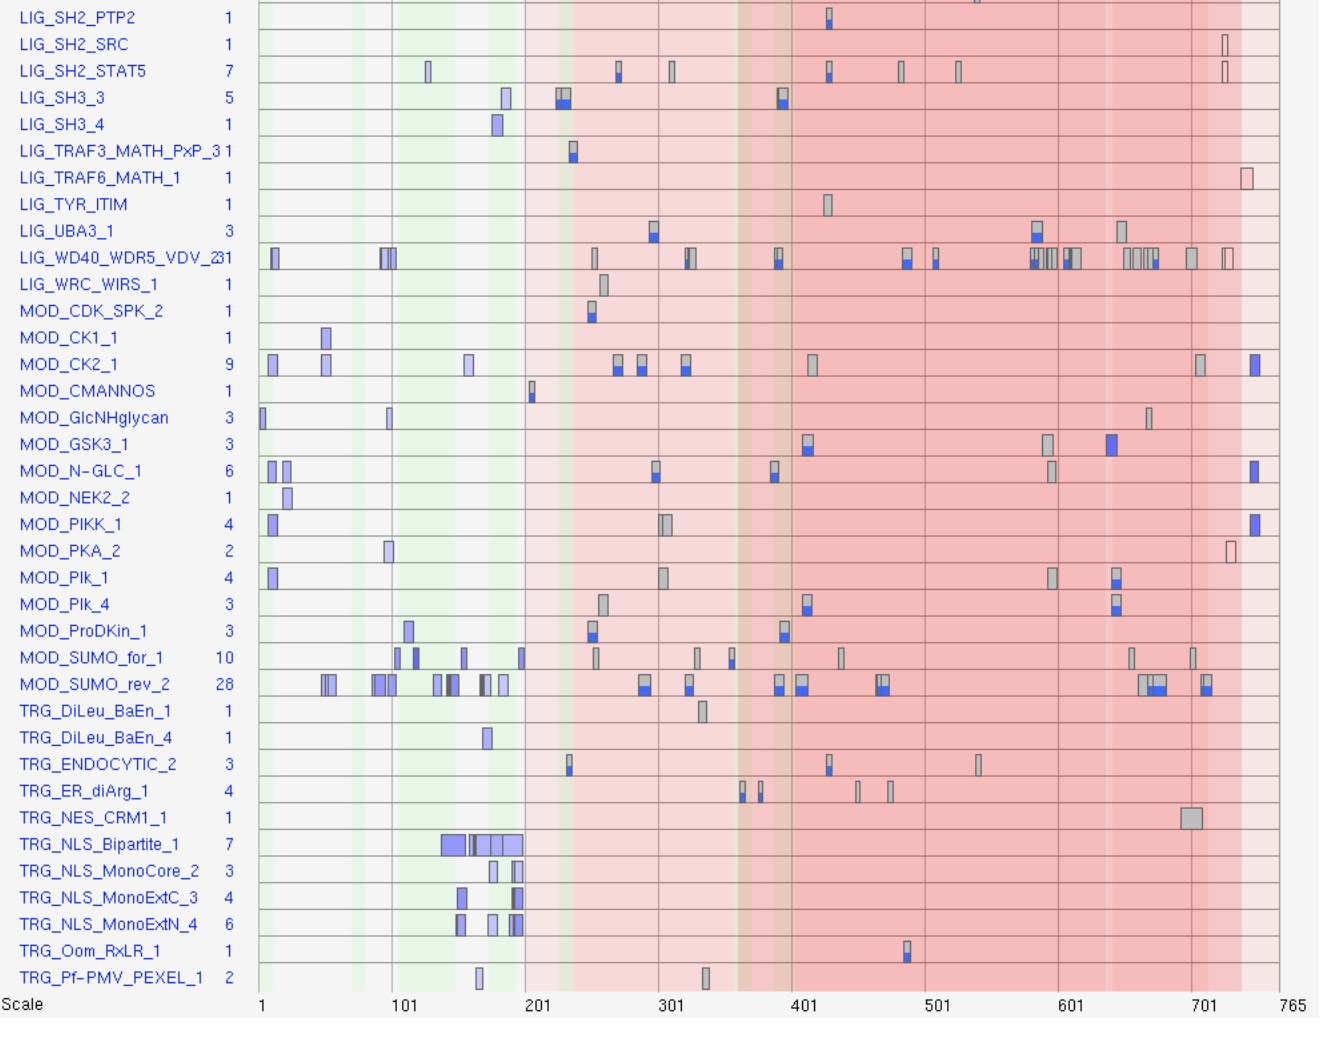

# Path 2: The input is a UniProt ID that does not match a protein contained in the ELM database
`gget elm` will return the motif information matching orthologous proteins contained in the ELM database based on DIAMOND alignment of its amino acid sequence fetched from UniProt + `gget elm` will generate regex matches based on its amino acid sequence fetched from UniProt.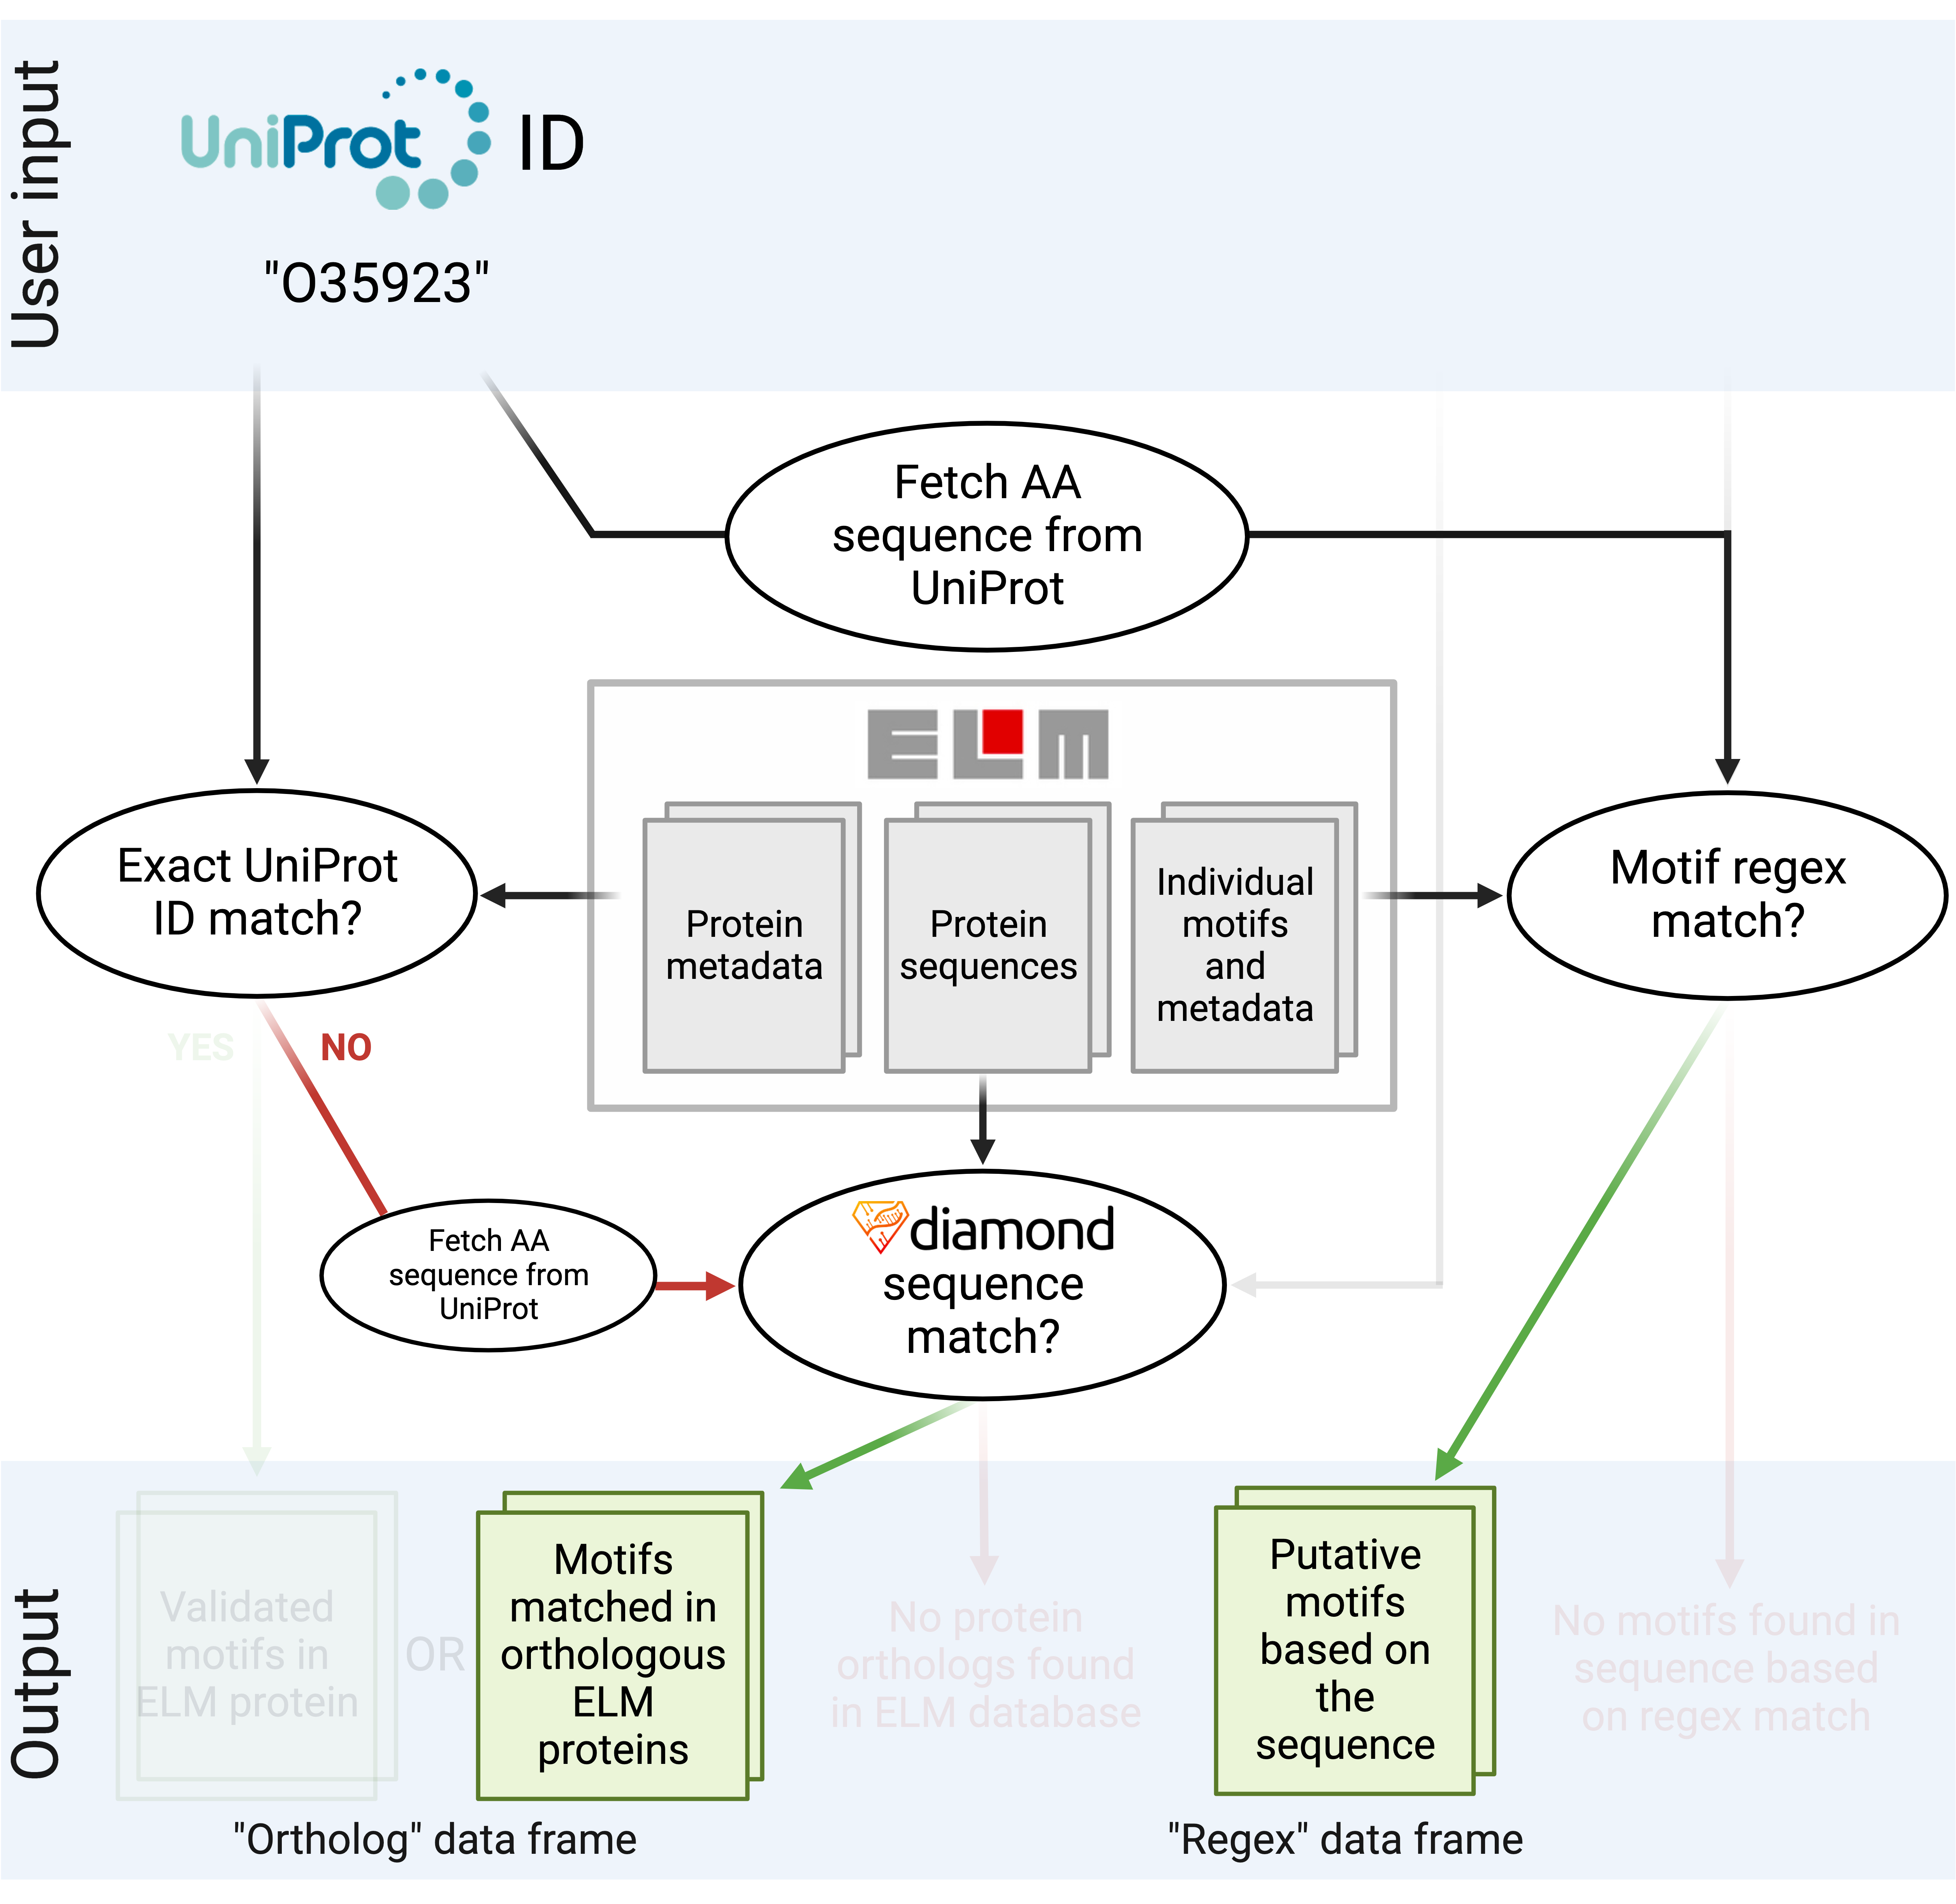

In [11]:
uniprot_id2 = "O35923"
ortholog2, regex2 = gget.elm(uniprot_id2, uniprot=True)

In [12]:
# The returned ortholog data frame contains information about the DIAMOND alignment (e.g. identity and whether the motif is within subject-query overlap)
ortholog2

Ortholog_UniProt_ID  ProteinName class_accession     ELMIdentifier  \
0              P51587  BRCA2_HUMAN      ELME000425    DOC_PP2A_B56_1   
1              P51587  BRCA2_HUMAN      ELME000413  LIG_PALB2_WD40_1   
2              P51587  BRCA2_HUMAN      ELME000442         MOD_Plk_1   

                         FunctionalSiteName  \
0          PP2A holoenzyme B56-docking site   
1  PALB2 WD40 repeat binding motif in BRCA2   
2             Polo-like kinase phosphosites   

                                         Description  \
0  Docking site required for the regulatory subun...   
1  A motif present in the BRCA2 protein which bin...   
2  Ser/Thr residue phosphorylated by the Plk1 kinase   

                                               Regex  Probability  \
0                   ([LMFYWIC]..I.E)|(L..[IVLWC].E).     0.001458   
1                                          ....WF..L     0.000009   
2  .[DNE][^PG][ST](([FYILMVW]..)|([^PEDGKN][FWYLI...     0.007674   

                                             Methods      Organism  \
0            alanine scanning; coimmunoprecipitation  Homo sapiens   
1  coimmunoprecipitation; fluorescence polarizati...  Homo sapiens   
2  alanine scanning; detection by mass spectromet...  Homo sapiens   

   query_seq_length  subject_seq_length  alignment_length  \
0              3343                3418              3417   
1              3343                3418              3417   
2              3343                3418              3417   

   identity_percentage  motif_in_query  query_start  query_end  subject_start  \
0                 56.6            True            1       3303              1   
1                 56.6            True            1       3303              1   
2                 56.6            True            1       3303              1   

   subject_end  motif_start_in_subject  motif_end_in_subject References  \
0         3371                    1114                  1119   27453045   
1         3371                      27                    35   19609323   
2         3371                     190                   196   12815053   

   InstanceLogic   PDB  #Instances  #Instances_in_PDB  
0  true positive   NaN          18                  2  
1  true positive  3EU7           1                  1  
2  true positive   NaN          44                  0

In [13]:
regex2

Instance_accession       ELMIdentifier         FunctionalSiteName  \
0            ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif   
1            ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif   
2            ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif   
3            ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif   
4            ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif   
...                 ...                 ...                        ...   
1276         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif   
1277         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif   
1278         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif   
1279         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif   
1280         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif   

     ELMType                                        Description  \
0        CLV             Caspase-3 and Caspase-7 cleavage site.   
1        CLV             Caspase-3 and Caspase-7 cleavage site.   
2        CLV             Caspase-3 and Caspase-7 cleavage site.   
3        CLV             Caspase-3 and Caspase-7 cleavage site.   
4        CLV             Caspase-3 and Caspase-7 cleavage site.   
...      ...                                                ...   
1276     TRG  Plasmodium Export Element, PEXEL, is a traffic...   
1277     TRG  Plasmodium Export Element, PEXEL, is a traffic...   
1278     TRG  Plasmodium Export Element, PEXEL, is a traffic...   
1279     TRG  Plasmodium Export Element, PEXEL, is a traffic...   
1280     TRG  Plasmodium Export Element, PEXEL, is a traffic...   

                                    Regex Instances (Matched Sequence)  \
0             [DSTE][^P][^DEWHFYC]D[GSAN]                        SVSDS   
1             [DSTE][^P][^DEWHFYC]D[GSAN]                        TRTDG   
2             [DSTE][^P][^DEWHFYC]D[GSAN]                        EELDA   
3             [DSTE][^P][^DEWHFYC]D[GSAN]                        TNVDS   
4             [DSTE][^P][^DEWHFYC]D[GSAN]                        SCKDN   
...                                   ...                          ...   
1276  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                        RDLQD   
1277  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                        RALCD   
1278  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                       RCLNPE   
1279  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                        RVLLQ   
1280  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                       RALTRQ   

     motif_start_in_query motif_end_in_query  InstanceLogic  #Instances  \
0                     238                243  true positive          41   
1                     324                329  true positive          41   
2                     513                518  true positive          41   
3                     614                619  true positive          41   
4                     781                786  true positive          41   
...                   ...                ...            ...         ...   
1276                 2417               2422  true positive          24   
1277                 2531               2536  true positive          24   
1278                 2574               2580  true positive          24   
1279                 2580               2585  true positive          24   
1280                 2817               2823  true positive          24   

      #Instances_in_PDB  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
1276                  0  
1277                  0  
1278                  0  
1279                  0  
1280                  0  

[1281 rows x 12 columns]

In [14]:
print("Number of unique motifs found: ", len(regex2["ELMIdentifier"].unique()))
print("Motifs found: ", regex2["ELMIdentifier"].unique())

Number of unique motifs found:  122
Motifs found:  ['CLV_C14_Caspase3-7' 'CLV_NRD_NRD_1' 'CLV_PCSK_FUR_1' 'CLV_PCSK_KEX2_1'
 'CLV_PCSK_PC1ET2_1' 'CLV_PCSK_SKI1_1' 'DEG_APCC_DBOX_1'
 'DEG_APCC_KENBOX_2' 'DEG_COP1_1' 'DEG_ODPH_VHL_1' 'DEG_SCF_FBW7_1'
 'DEG_SCF_FBW7_2' 'DEG_SCF_TRCP1_1' 'DEG_SPOP_SBC_1' 'DOC_CKS1_1'
 'DOC_CYCLIN_RevRxL_6' 'DOC_CYCLIN_RxL_1' 'DOC_CYCLIN_yCln2_LP_2'
 'DOC_MAPK_DCC_7' 'DOC_MAPK_FxFP_2' 'DOC_MAPK_gen_1' 'DOC_MAPK_MEF2A_6'
 'DOC_PP1_RVXF_1' 'DOC_PP2A_B56_1' 'DOC_PP2B_PxIxIT_1' 'DOC_PP4_FxxP_1'
 'DOC_USP7_MATH_1' 'DOC_USP7_UBL2_3' 'DOC_WW_Pin1_4' 'LIG_14-3-3_CanoR_1'
 'LIG_Actin_WH2_2' 'LIG_APCC_ABBA_1' 'LIG_APCC_ABBAyCdc20_2'
 'LIG_APCC_Cbox_2' 'LIG_Arc_Nlobe_1' 'LIG_BRCT_BRCA1_1' 'LIG_BRCT_BRCA1_2'
 'LIG_deltaCOP1_diTrp_1' 'LIG_EH1_1' 'LIG_eIF4E_1' 'LIG_EVH1_1'
 'LIG_FHA_1' 'LIG_FHA_2' 'LIG_HCF-1_HBM_1' 'LIG_IRF7_LxLS_2'
 'LIG_IRFs_LxIS_1' 'LIG_KLC1_WD_1' 'LIG_LIR_Apic_2' 'LIG_LIR_Gen_1'
 'LIG_LIR_Nem_3' 'LIG_MAD2' 'LIG_MLH1_MIPbox_1' 'LIG_MYND_1' 'LIG_MYND_3

Corresponding result from the ELM website interface (fetch time 00:23.04, compared to 00:07 with `gget`):
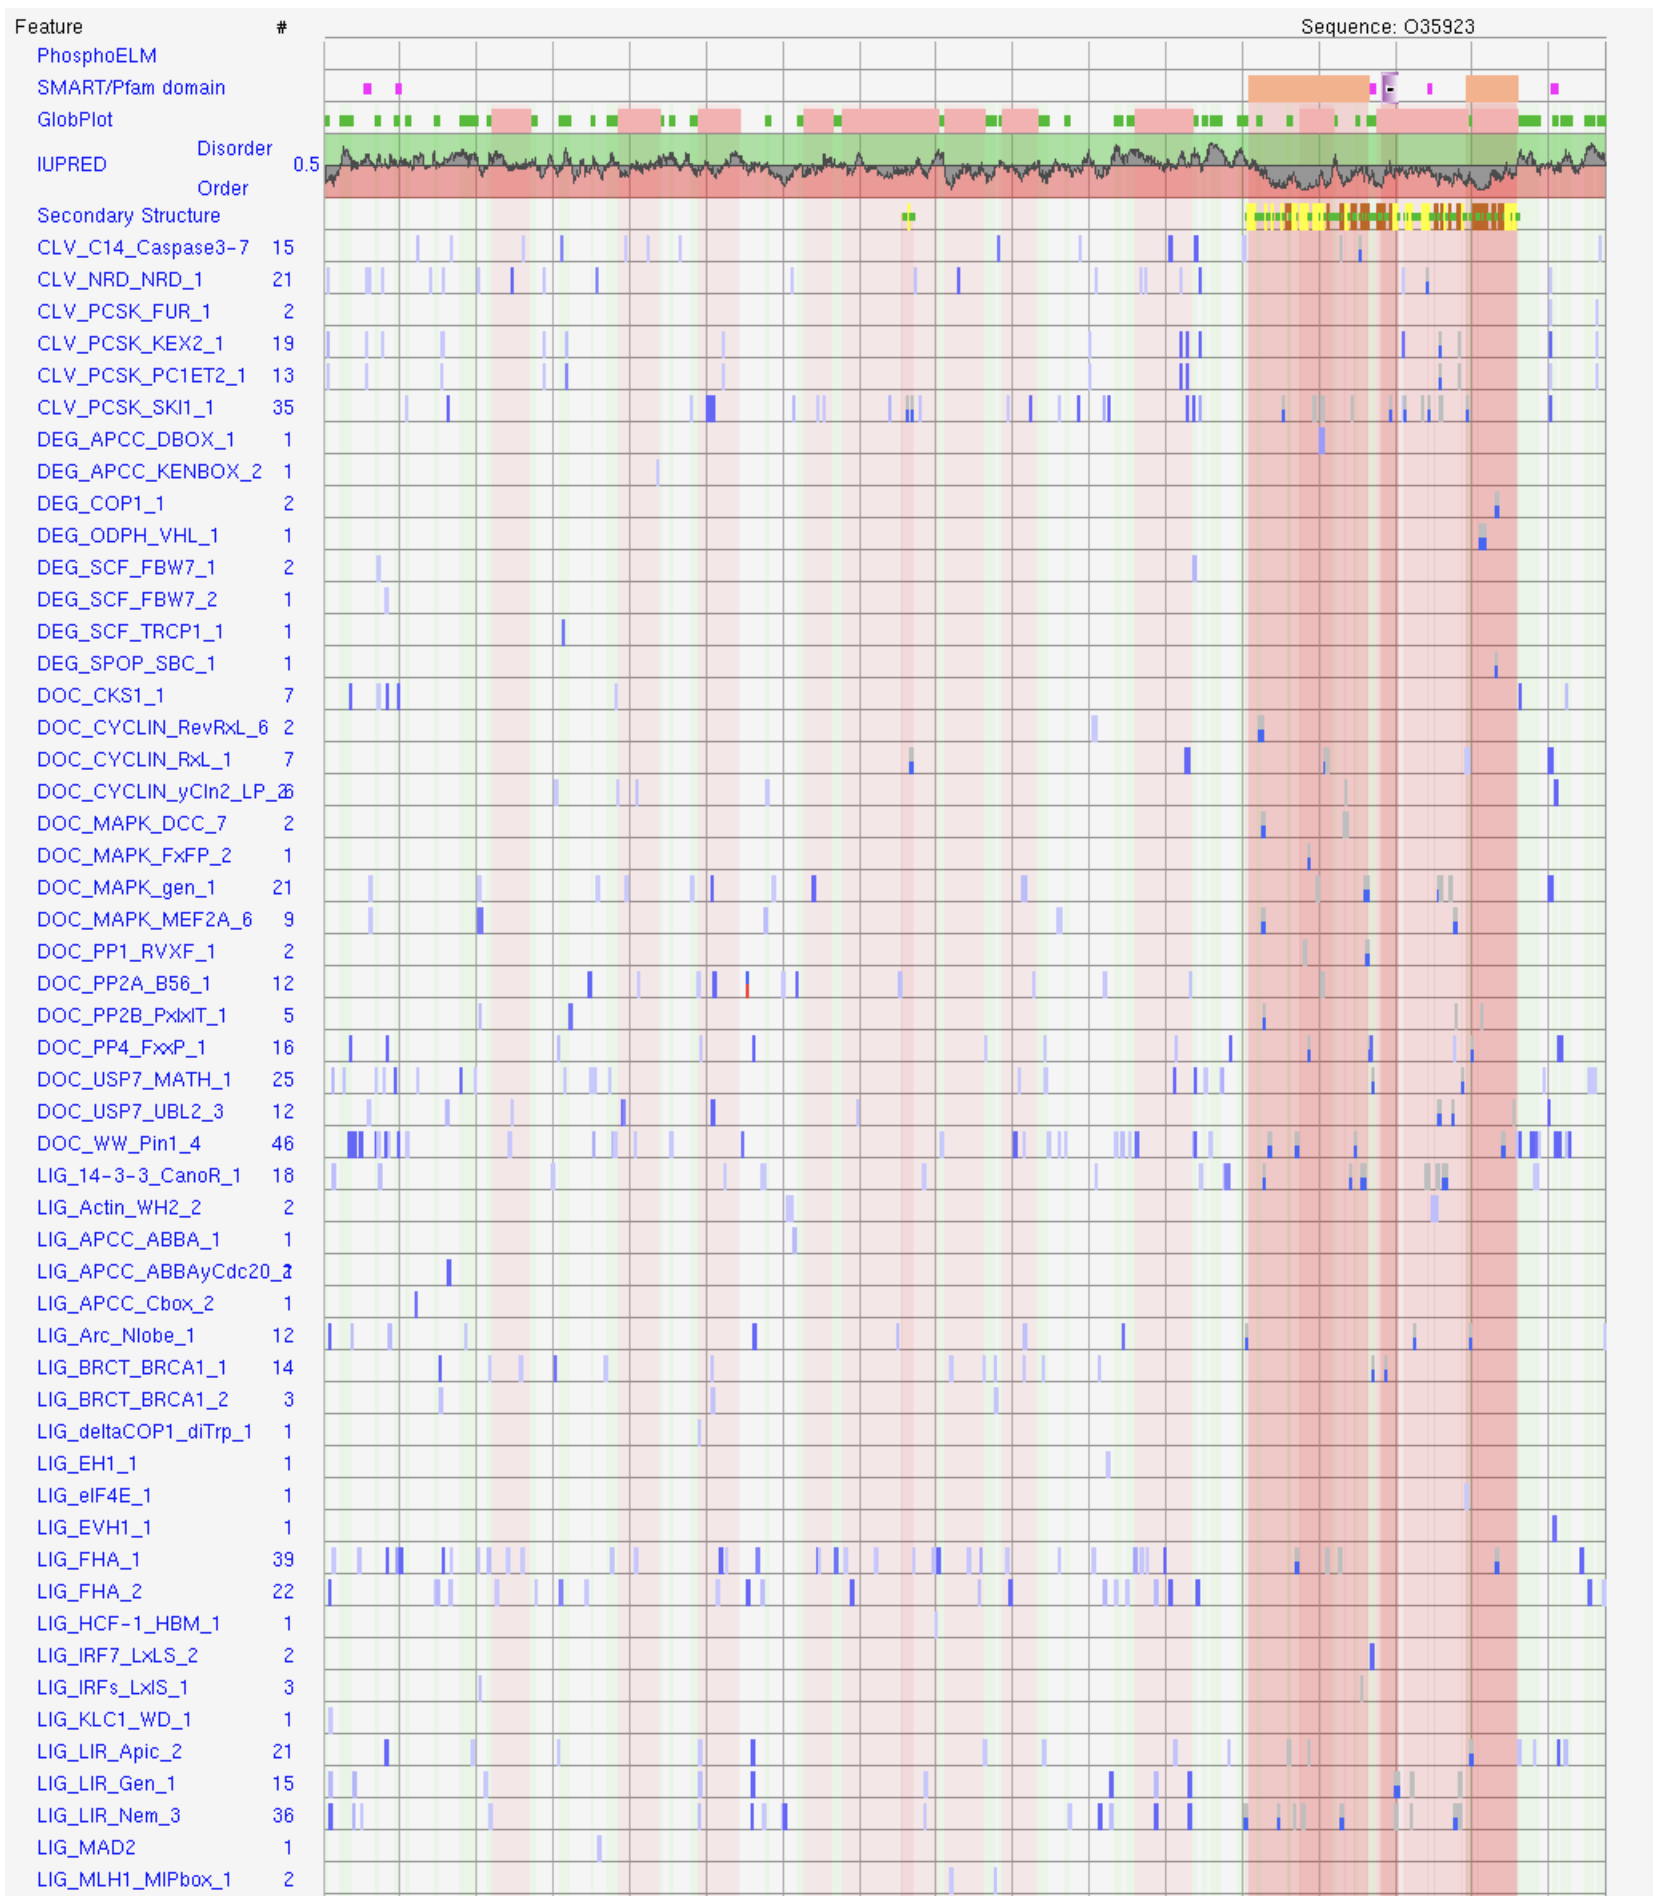

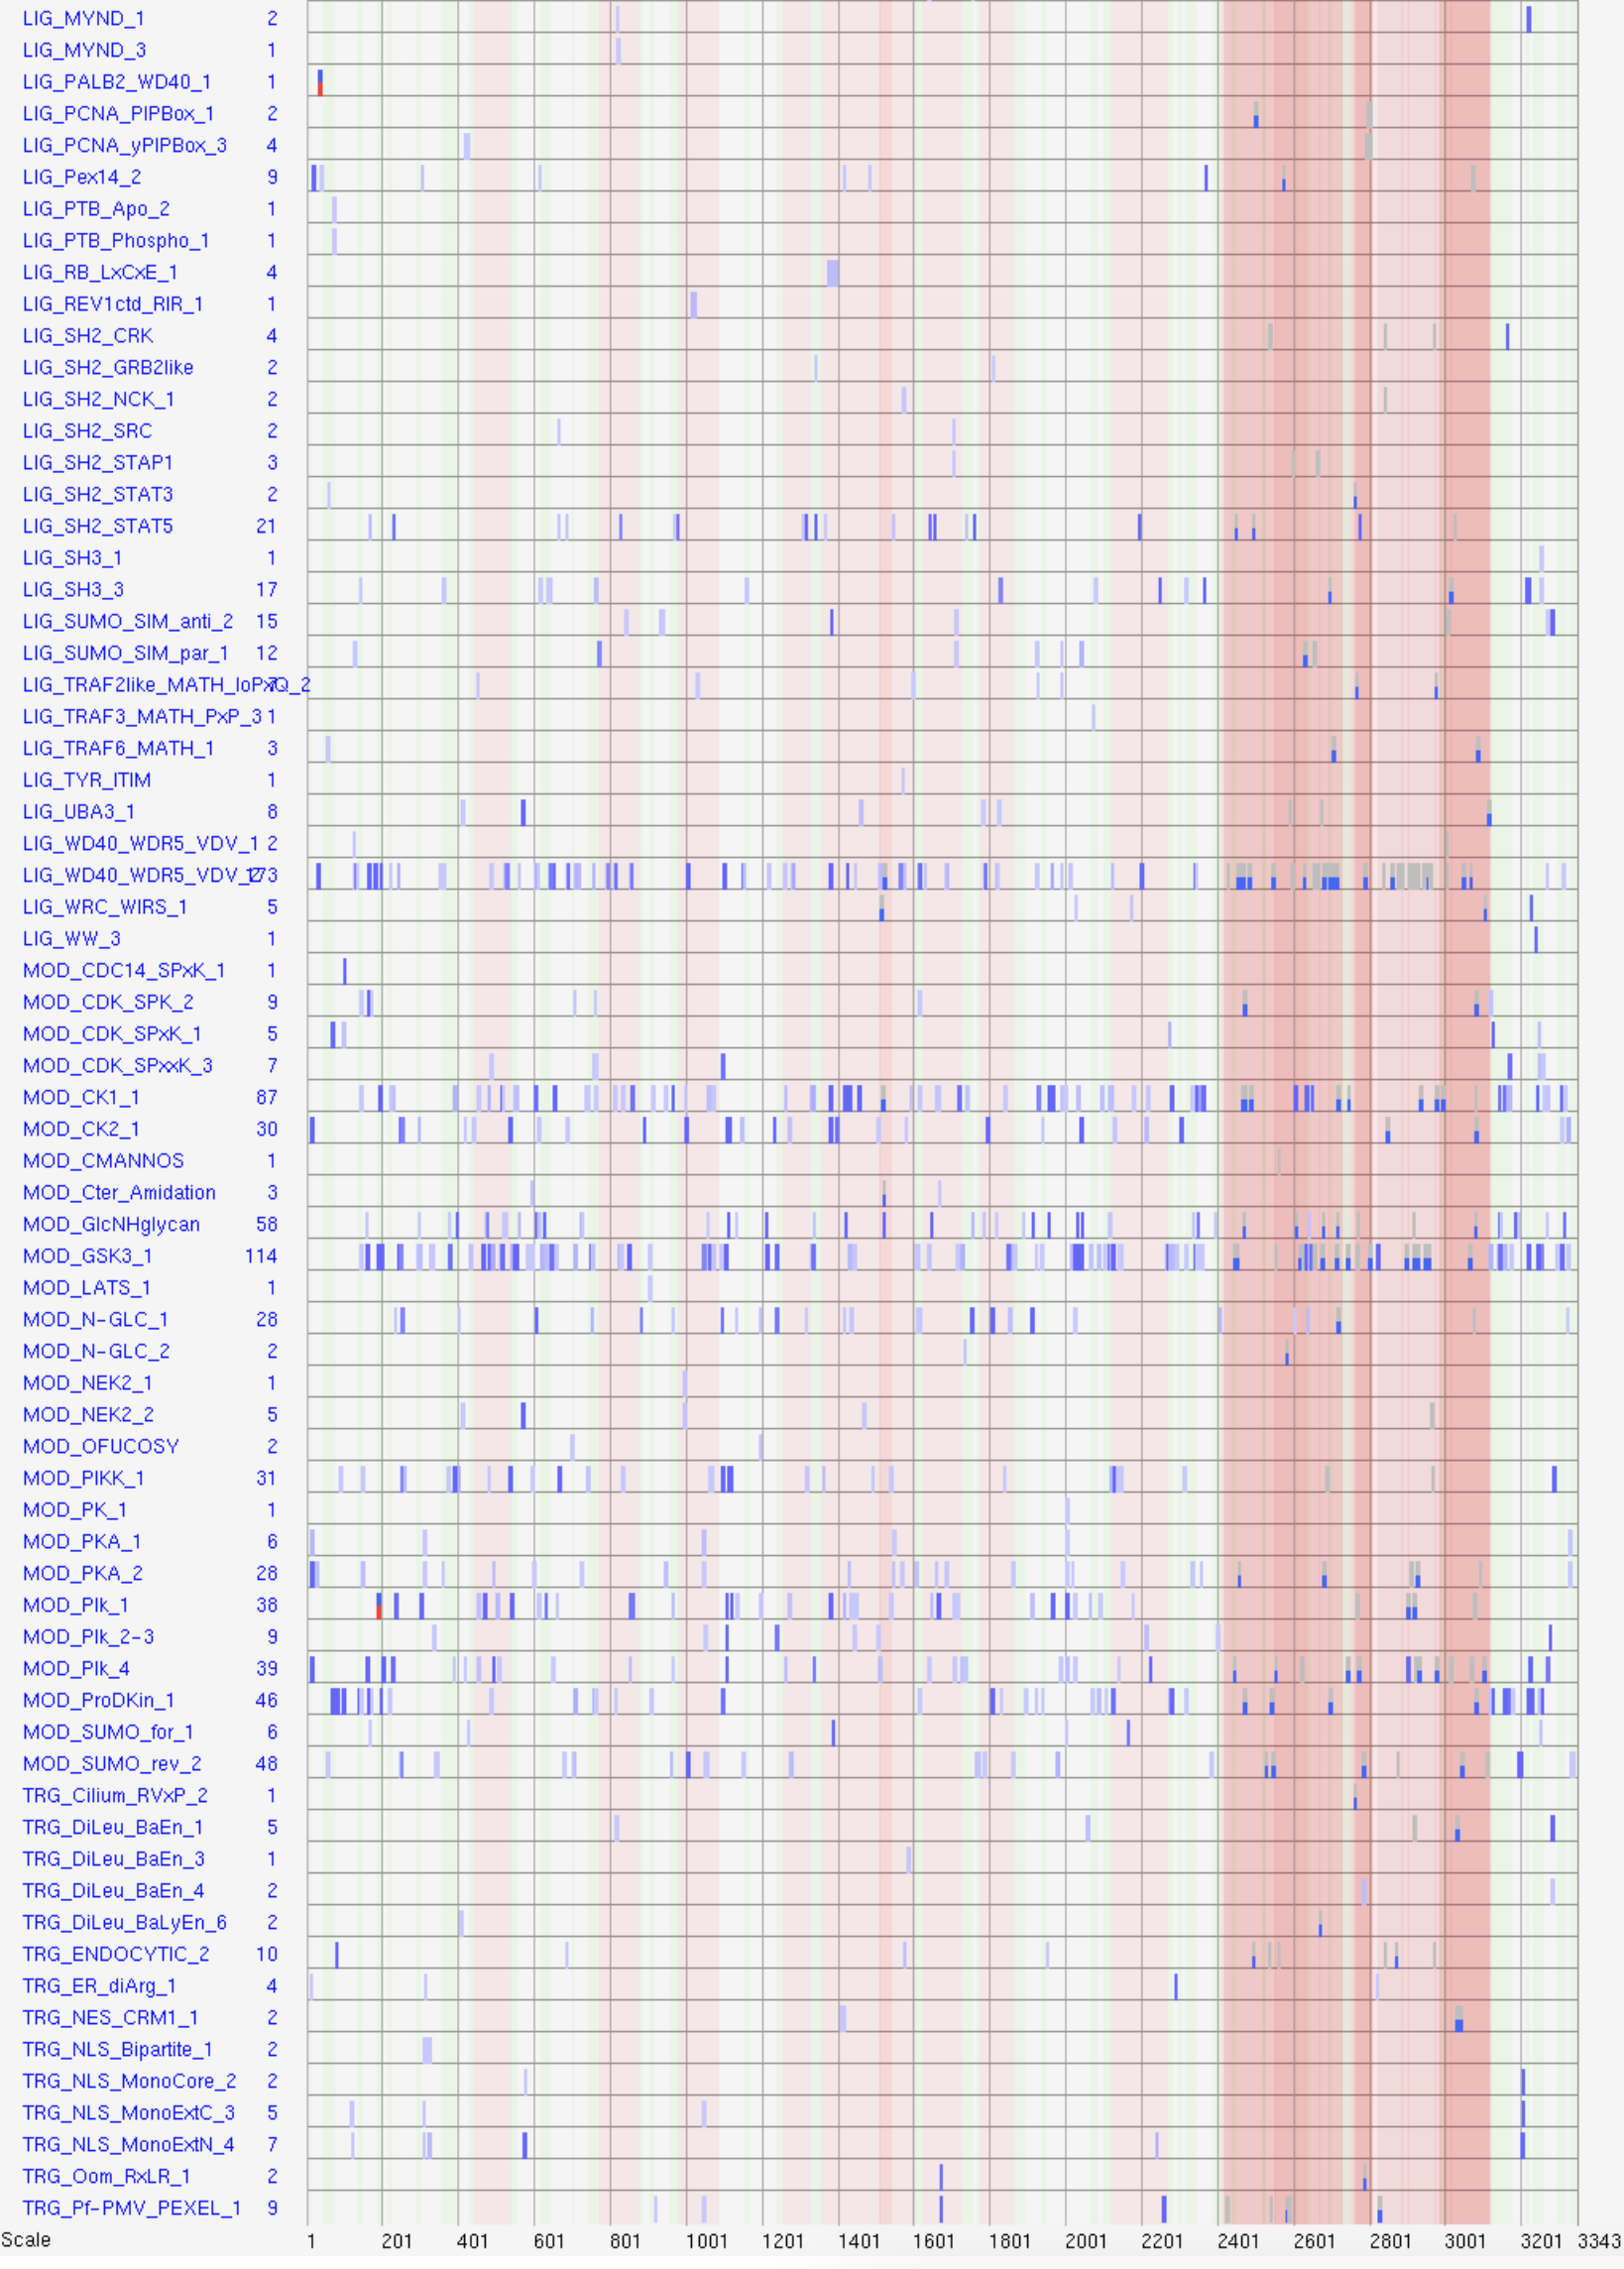

# Path 3: The input is an amino acid sequence
`gget elm` will return the information matching orthologous proteins contained in the ELM database based on DIAMOND alignment of the amino acid sequence + `gget elm` will generate regex matches based on the provided sequence.
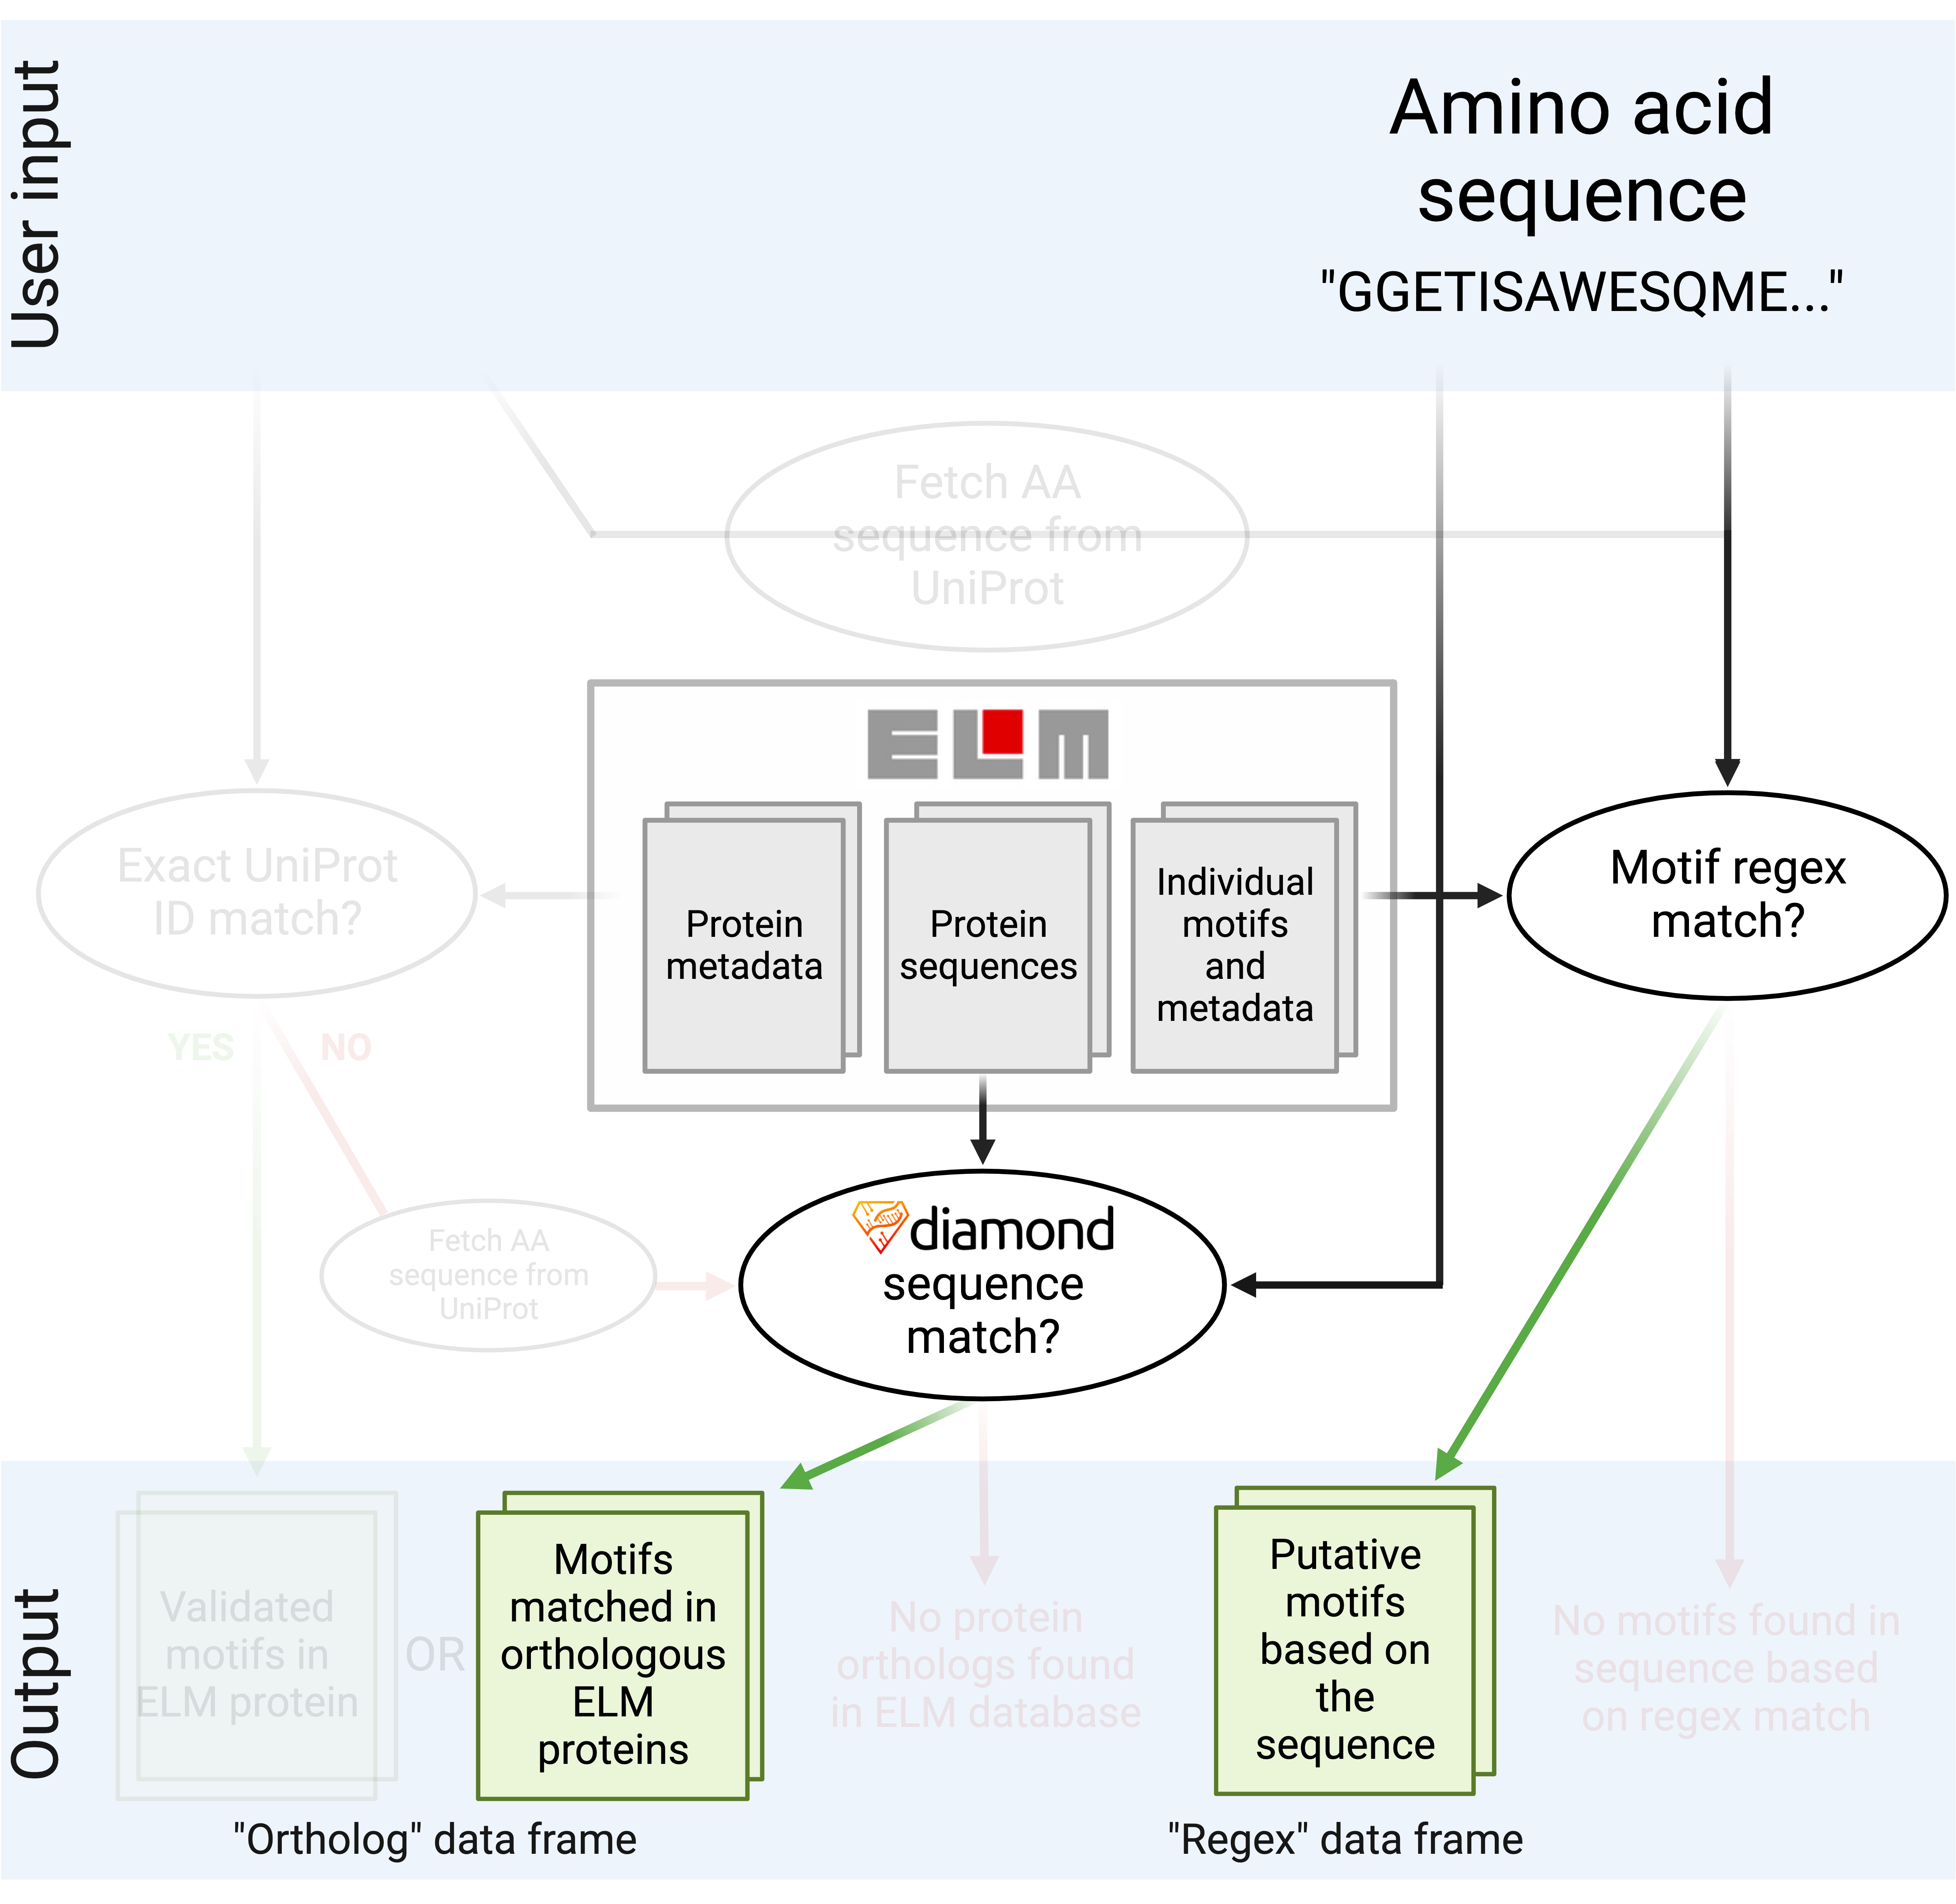

In [15]:
seq = "GGETISAWESQMEELVISISALIVELQVEFRANKLINPACHTERLABRQCKSFKIEPPGLFRGRG"
ortholog3, regex3 = gget.elm(seq, uniprot=False)

In [16]:
# The returned ortholog data frame contains information about the DIAMOND alignment (e.g. identity and whether motif is within subject-query overlap)
ortholog3

Ortholog_UniProt_ID ProteinName class_accession ELMIdentifier  \
0              P11387  TOP1_HUMAN      ELME000251    LIG_KEPE_2   

  FunctionalSiteName                                        Description  \
0   Sumoylation site  Medium length variant of the KEPE motif which ...   

                    Regex  Probability                    Methods  \
0  [VILMFT]K.EP.{2,3}[DE]     0.000035  sequence based prediction   

       Organism  query_seq_length  subject_seq_length  alignment_length  \
0  Homo sapiens                65                 765                25   

   identity_percentage  motif_in_query  query_start  query_end  subject_start  \
0                 68.0           False           41         65            346   

   subject_end  motif_start_in_subject  motif_end_in_subject References  \
0          365                     116                   123   19033273   

   InstanceLogic  PDB  #Instances  #Instances_in_PDB  
0  true positive  NaN          12                  0

In [17]:
regex3

Instance_accession          ELMIdentifier  \
0          ELME000146        CLV_PCSK_SKI1_1   
1          ELME000491  DOC_CYCLIN_yCln2_LP_2   
2          ELME000239        DOC_USP7_MATH_1   
3          ELME000417     LIG_14-3-3_CanoR_1   
4          ELME000058             LIG_EVH1_2   
5          ELME000052              LIG_FHA_1   
6          ELME000439        LIG_IRFs_LxIS_1   
7          ELME000408          LIG_KLC1_WD_1   
8          ELME000333     LIG_SUMO_SIM_par_1   
9          ELME000531       LIG_TRAF4_MATH_1   
10         ELME000531       LIG_TRAF4_MATH_1   
11         ELME000365    LIG_WD40_WDR5_VDV_2   
12         ELME000365    LIG_WD40_WDR5_VDV_2   
13         ELME000365    LIG_WD40_WDR5_VDV_2   
14         ELME000064              MOD_CK2_1   
15         ELME000064              MOD_CK2_1   
16         ELME000085        MOD_GlcNHglycan   
17         ELME000085        MOD_GlcNHglycan   
18         ELME000053             MOD_GSK3_1   
19         ELME000202             MOD_PIKK_1   
20         ELME000002         MOD_SUMO_for_1   
21         ELME000012         TRG_ER_diArg_1   
22         ELME000193         TRG_NES_CRM1_1   

                                   FunctionalSiteName ELMType  \
0                                  PCSK cleavage site     CLV   
1             Cyclin N-terminal Domain Docking Motifs     DOC   
2                                  USP7 binding motif     DOC   
3                 14-3-3 binding phosphopeptide motif     LIG   
4                                       EVH1  ligands     LIG   
5                          FHA phosphopeptide ligands     LIG   
6             IRF interaction and dimerisation motifs     LIG   
7   Motifs binding the TPR domain of kinesin light...     LIG   
8                               SUMO interaction site     LIG   
9   Motif which binds to the MATH domain of the TR...     LIG   
10  Motif which binds to the MATH domain of the TR...     LIG   
11        WDR5 WD40 repeat (blade 5,6)-binding ligand     LIG   
12        WDR5 WD40 repeat (blade 5,6)-binding ligand     LIG   
13        WDR5 WD40 repeat (blade 5,6)-binding ligand     LIG   
14         Casein kinase 2 (CK2) Phosphorylation site     MOD   
15         Casein kinase 2 (CK2) Phosphorylation site     MOD   
16                  Glycosaminoglycan attachment site     MOD   
17                  Glycosaminoglycan attachment site     MOD   
18                          GSK3 phosphorylation site     MOD   
19                          PIKK phosphorylation site     MOD   
20                                   Sumoylation site     MOD   
21            di Arginine retention/retrieving signal     TRG   
22                         NES Nuclear Export Signals     TRG   

                                          Description  \
0   Subtilisin/kexin isozyme-1 (SKI1) cleavage sit...   
1   The budding yeast G1/S cyclins Cln1 and 2 bind...   
2   The USP7 MATH domain binding motif variant bas...   
3   Canonical Arg-containing phospho-motif mediati...   
4   Proline-rich motif binding to signal transduct...   
5   Phosphothreonine motif binding a subset of FHA...   
6   A binding site for proteins IRF-3, IRF-5 and I...   
7   This short WD or WE motif is found in cargo pr...   
8   Motif for the parallel beta augmentation mode ...   
9    A TRAF4 MATH domain binding motif present in ...   
10   A TRAF4 MATH domain binding motif present in ...   
11  Fungi-specific variant of the WDR5-binding mot...   
12  Fungi-specific variant of the WDR5-binding mot...   
13  Fungi-specific variant of the WDR5-binding mot...   
14         Casein kinase 2 (CK2) phosphorylation site   
15         Casein kinase 2 (CK2) phosphorylation site   
16                  Glycosaminoglycan attachment site   
17                  Glycosaminoglycan attachment site   
18              GSK3 phosphorylation recognition site   
19  (ST)Q motif which is phosphorylated by PIKK fa...   
20        Motif recognised for modification by SUMO-1   
21  The di-Arg ER retention motif i

In [18]:
print("Number of unique motifs found: ", len(regex3["ELMIdentifier"].unique()))
print("Motifs found: ", regex3["ELMIdentifier"].unique())

Number of unique motifs found:  18
Motifs found:  ['CLV_PCSK_SKI1_1' 'DOC_CYCLIN_yCln2_LP_2' 'DOC_USP7_MATH_1'
 'LIG_14-3-3_CanoR_1' 'LIG_EVH1_2' 'LIG_FHA_1' 'LIG_IRFs_LxIS_1'
 'LIG_KLC1_WD_1' 'LIG_SUMO_SIM_par_1' 'LIG_TRAF4_MATH_1'
 'LIG_WD40_WDR5_VDV_2' 'MOD_CK2_1' 'MOD_GlcNHglycan' 'MOD_GSK3_1'
 'MOD_PIKK_1' 'MOD_SUMO_for_1' 'TRG_ER_diArg_1' 'TRG_NES_CRM1_1']


Corresponding result from the ELM website interface (fetch time 04:13.00 (compared to 1s with `gget elm`)):  
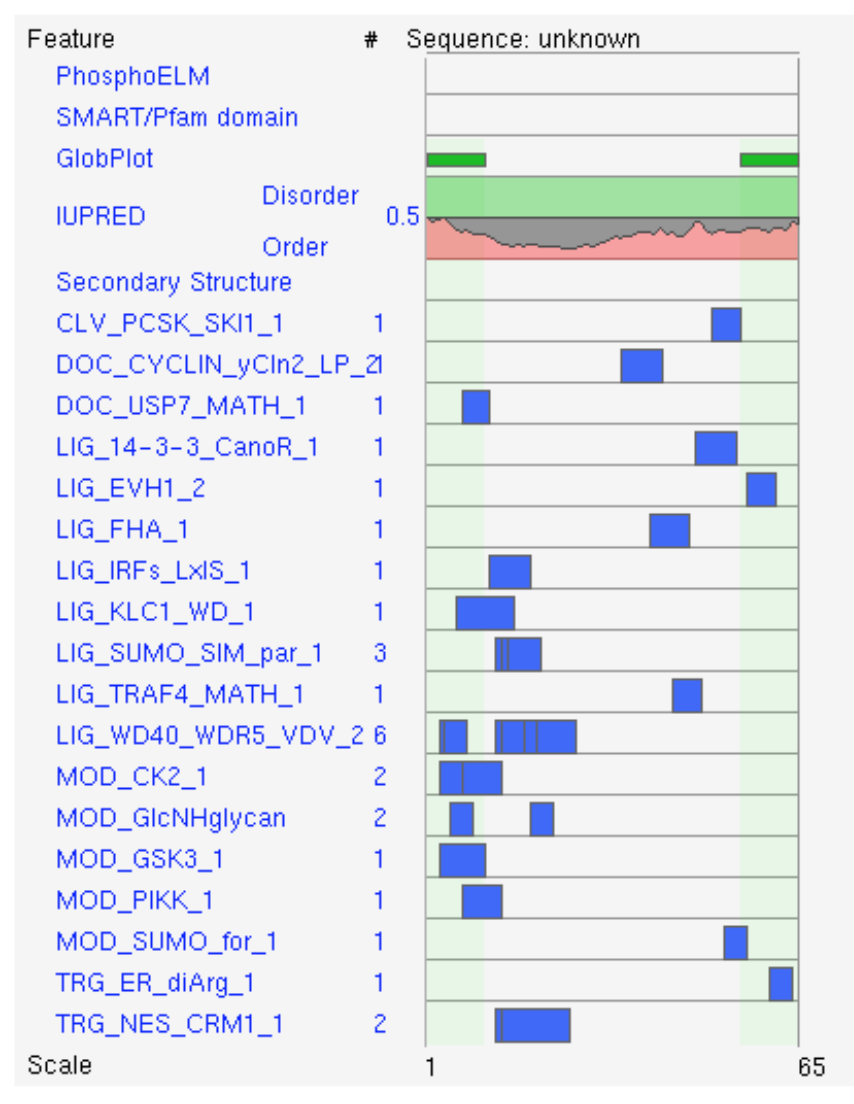